# 分類器の精度指標

### 用語
- 正確度（accuracy)
    
    全データのうち予測が的中したデータの割合
    
- 適合率（precision）
    
    陽性であると予測したデータのうち、実際に陽性であったデータの割合。
    
    - 陽性と判別することに損失が伴う場合。(不良品判別)
    - 医者の見落としをキャッチするAI
- 再現率（recall）感度（sensitivity）
    
    実際に陽性であるデータのうち、陽性であると正しく予測したデータの割合。
    
    - 陽性を取りこぼしたくない場合。
    - 読影前段のAI診断
- 特異度(specificity）
    
    陰性のデータに対して、どれだけ陰性と予測できたか、Recallの陰性バージョン
    
- F値

    PrecisionとRecallどちらを重視するかによって、閾値の基準とすることもできる。

- ROC

    Sensitivity(Recall)とSpecificityのトレードオフ

### 準備
ロジスティック回帰

y_pred_proba = model.predict_proba(X_test)で、確率のarrayを作成。

In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
df = pd.read_csv("data/heart_preprocessed.csv")
df.head()
y_col = "target"
X = df.drop(columns=[y_col])
y = df[y_col]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
# モデル構築
model = LogisticRegression(solver="liblinear")
model.fit(X_train, y_train)
y_pred_proba = model.predict_proba(X_test)

In [26]:
y_test

993    0
859    0
298    0
553    1
672    1
      ..
167    0
998    1
984    0
491    0
10     1
Name: target, Length: 300, dtype: int64

In [27]:
y_pred_proba[:10]

array([[0.49557281, 0.50442719],
       [0.28325102, 0.71674898],
       [0.99733358, 0.00266642],
       [0.06907229, 0.93092771],
       [0.4793277 , 0.5206723 ],
       [0.99002568, 0.00997432],
       [0.66307307, 0.33692693],
       [0.79308362, 0.20691638],
       [0.30219419, 0.69780581],
       [0.30219419, 0.69780581]])

In [28]:
model.classes_

array([0, 1])

## Precision Recall Curve
model.predict_probaで確率を見た後にPrecision-Recall Curveを見て、閾値を決める。



sklearn.metrics.precision_recall_curve

- precision_recall_curve(y_true, probas_pred)
- y_trueと各データの確率値をリストにしたprobas_predを引数に渡す
- probas_predは陽性の確率のみ。
- precision, recall, thresholdsの3つの一次元NumpyArrayを返す
- precisionとrecallの最後の要素はそれぞれ1と0である事に注意

In [29]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba[:, 1])

In [30]:
precision[:10]

array([0.5509434 , 0.54924242, 0.55343511, 0.55555556, 0.55984556,
       0.5620155 , 0.56640625, 0.56862745, 0.57312253, 0.58      ])

In [31]:
recall[:10]

array([1.        , 0.99315068, 0.99315068, 0.99315068, 0.99315068,
       0.99315068, 0.99315068, 0.99315068, 0.99315068, 0.99315068])

thereholdsは0から1ギリギリの数へ少しづつ上がっているリスト

In [38]:
thresholds[:10]

array([0.01648879, 0.01657007, 0.01683855, 0.01740022, 0.01756798,
       0.01809932, 0.02207066, 0.02259539, 0.02310219, 0.02394928])

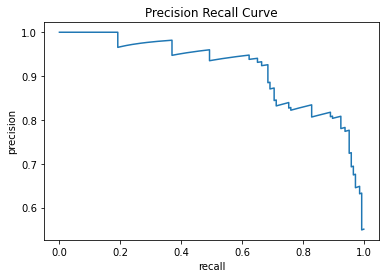

In [33]:
import matplotlib.pyplot as plt
plt.plot(recall, precision)
plt.xlabel("recall")
plt.ylabel('precision')
plt.title('Precision Recall Curve')
plt.show()

In [34]:
recall[-1]

0.0

In [35]:
precision[-1]

1.0

recallが0、precisionが1に対応する閾値(1のこと)はthresholdsにはないので、len(thresholds)は他より1つ小さい。

In [39]:
print(len(recall))
print(len(precision))
print(len(thresholds))

187
187
186


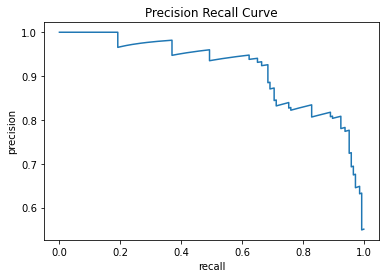

In [40]:
# 上のグラフと同じもの
import matplotlib.pyplot as plt
plt.plot(recall, precision)
plt.xlabel("recall")
plt.ylabel('precision')
plt.title('Precision Recall Curve')
plt.show()


上のグラフからでは、precisionとrecallの両方を重視したい時にどうすれば良いのかわからない。

→F値を用いる。

## F値

- PrecisionとRecallの調和平均を取った値
- PrecisionもRecallも犠牲にしたくない場合はF値が高いモデルを採用する

sklearn.metrics.f1_score
- f1_score(y_true, y_pred)
- 他の指標同様にaverage引数で"macro"や”micro"など選択可能

In [42]:
from sklearn.metrics import f1_score, recall_score, precision_score
y_true = [1, 0, 0, 1, 0, 0, 1, 1]
y_pred = [1, 1, 1, 0, 0, 1, 0, 1]
f1_score(y_true, y_pred)

0.4444444444444445

In [47]:
# 調和平均ver
from scipy.stats import hmean
hmean([recall_score(y_true, y_pred), precision_score(y_true, y_pred)])

0.4444444444444444

## Thresholds vs Precision, Recall, Fscore(練習)
閾値に対してのPrecision, Recall, F値の推移を描画しよう

In [50]:
import matplotlib.pyplot as plt

precision, recall, thresholds = precision_recall_curve(
    y_test, y_pred_proba[:, 1])

f1_scores = [hmean([p, r]) for p, r in zip(precision, recall)]


ValueError: x and y must have same first dimension, but have shapes (186,) and (187,)

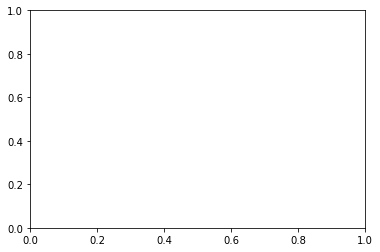

In [51]:
plt.plot(thresholds, f1_scores)


thresholdsの要素が一つ足りていないため、エラーになる。

最後の要素のひとつ前までを指定する。


66th threshold(=0.44) is the highest f1 score = 0.8626


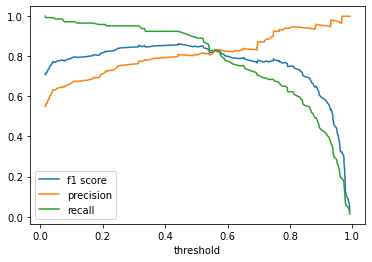

In [65]:
import numpy as np
plt.plot(thresholds, f1_scores[:-1], label="f1 score")
plt.plot(thresholds, precision[:-1], label="precision")
plt.plot(thresholds, recall[:-1], label="recall")
plt.xlabel("threshold")
plt.legend()
# 最もF1スコアが高い時の閾値は幾つなのかを調べる。
print(f"{np.argmax(f1_scores)}th threshold(={thresholds[np.argmax(f1_scores)]:.2f}) is the highest f1 score = {np.max(f1_scores):.4f}")


右にいくにつれて、陰性と判断するものが多くなる。

## ROC(Receiver Operating Charactaristic)
Sensitivity(TPR True Positive Rate) vs 1 - Specificity(FPR False Positive Rate)

- Sensitivity(Recall)とSpecificityはトレードオフの関係にある(陽性版と陰性版のため)
- 横軸1 - Specificity(陰性データに対して間違えて陽性に分類した割合), 縦軸Sensitivityとした時に閾値の変化が描くカーブ
- 分類機の評価で最も使われる指標の一つ

sklearn.metrics.roc_curve
 - roc_curve(y_true, y_score)
 - y_scoreには陽性の確率の値を入れれば良い
 - fpr, tpr, thresholdsの3つの一次元NumpyArrayを返す

Text(0.5, 1.0, 'ROC Curve')

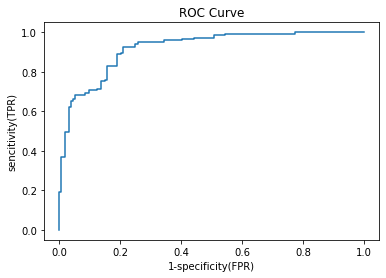

In [72]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:, 1])
# 描画
plt.plot(fpr, tpr)
plt.xlabel("1-specificity(FPR)")
plt.ylabel("sencitivity(TPR)")
plt.title("ROC Curve")


thresholdsはだんだん小さくなっている。thresholdsが極端に高いと全てのデータを陰性に判別するので、TPRもFPRも0になる。

In [73]:
thresholds[:10]

array([1.99180594, 0.99180594, 0.97780997, 0.97724741, 0.97670853,
       0.96692323, 0.96565166, 0.96115341, 0.96020045, 0.95937584])

## AUC(Area Under the Curve)
- ROCにおける精度を数値化したもの
- ROCが作る面積
- 1が最大で、ランダムな分類器では0.5になる

sklearn.metrics.auc
- auc(fpr, tpr)
- fprとtprはroc_curve関数の戻り値を使えば良い

In [76]:
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
fpr, tpr, _  = roc_curve(y_test, y_pred_proba[:, 1])
auc(fpr, tpr)
# 0.8以上だとまあ良い

0.9196762141967622

## 多クラス分類におけるROC
- 多クラス分類の場合macro平均もしくはmicro平均をする
- macro平均：OvRでクラス数分のROCを描画し、その平均を取る(データ数が少ないクラスの値も重視)
- micro平均：OvRとした時の結果(FPR,TPR)でまとめてROCを描く(データ数が多いクラスの結果を重視)

macro平均、micro平均のどちらも描画してそれぞれ説明するのが一般的。

多クラスROC
- 正解ラベルはone-hotの形にする
- macro平均を求めるにはそれぞれのクラス別のfpr, tprを求め、線形補完し平均を取る
- micro平均はone-hotの形の正解ラベルと予測した確率リストを一次元配列にしてroc_curve()に入れれば良い

データの準備

In [99]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import seaborn as sns

# irisデータの準備
df = sns.load_dataset("iris")
y_col = "species"
X = df.drop(columns=[y_col])
y = df[y_col]
# hold-out
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)
# モデル学習
model = LogisticRegression()
model.fit(X_train, y_train)
# 予測
y_pred_proba = model.predict_proba(X_test)


/Users/hiroto/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### macro平均

正解ラベルをone-hotの形にする

In [101]:
from sklearn.preprocessing import label_binarize
y_test_one_hot = label_binarize(y_test, classes=model.classes_)



In [102]:
y_test_one_hot[:5]


array([[0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0]])

In [103]:
y_test[:5]

114     virginica
62     versicolor
33         setosa
107     virginica
7          setosa
Name: species, dtype: object

In [104]:
model.classes_

array(['setosa', 'versicolor', 'virginica'], dtype=object)

#### それぞれのクラスのROCを描画

クラスごとのfprとtprを求める

In [105]:
# fpr_0, tpr_0, _ = roc_curve(y_test_one_hot[:, 0], y_pred_proba[:, 0])
# fpr_1, tpr_1, _ = roc_curve(y_test_one_hot[:, 1], y_pred_proba[:, 1])
# fpr_2, tpr_2, _ = roc_curve(y_test_one_hot[:, 2], y_pred_proba[:, 2])


このように似たような変数を複数作りたいときは、辞書とfor文を使う。

In [106]:
n_classes = 3
fpr = {}
tpr = {}
roc_auc = {}
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_one_hot[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

In [107]:
fpr

{0: array([0., 0., 0., 1.]),
 1: array([0.        , 0.        , 0.        , 0.07407407, 0.07407407,
        1.        ]),
 2: array([0.        , 0.        , 0.        , 0.02941176, 0.02941176,
        1.        ])}

In [108]:
roc_auc

{0: 1.0, 1: 0.9958847736625515, 2: 0.9946524064171123}

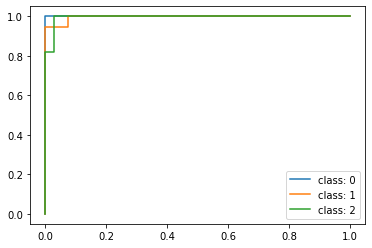

In [109]:
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f"class: {i}")
    plt.legend()

ここから、平均を取ったROC曲線を描きたい。
→xの値で、値が変化しているものに着目し、その値での他のクラスの値を線形補完する。

#### 線形補完
all_tpr, mean_fprの作成

np.interp(x, xp, yp)

- x: 補完後のx軸の値
- xp: xの値のリスト
- yp: yの値のリスト

In [ ]:
# for i in range(n_classes):
#     np.interp(xのリスト, fpr[i], tpr[i])

xのリストをどうやって作るのか？

→ fprにxの値が全て入っているので、np.uniqueを用いて固有な値を取り出す。

→ そのために、全ての要素をがっちゃんこした一次元配列を作る。

In [115]:
import numpy as np
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
all_fpr

array([0.        , 0.02941176, 0.07407407, 1.        ])

In [122]:
interped_tpr = {}
for i in range(n_classes):
    interped_tpr[i] = np.interp(all_fpr, fpr[i], tpr[i])
interped_tpr


{0: array([1., 1., 1., 1.]),
 1: array([0.94444444, 0.94444444, 1.        , 1.        ]),
 2: array([0.81818182, 1.        , 1.        , 1.        ])}

最終的には全てのROC曲線の平均を取ったものを描きたいので、interped_tprを経由せずに直接、各列の和をとったmean_tprを作成する。

In [124]:
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
mean_tpr = mean_tpr / n_classes
mean_tpr

array([0.92087542, 0.98148148, 1.        , 1.        ])

ここで、マクロ平均を描画するための材料が揃った。

最初に作ったfpr, tpr, roc_aucの辞書に、all_fpr, mean_tpr, auc(fpr["macro"], tpr["macro"])を追加する。

In [128]:
fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

In [127]:
fpr

{0: array([0., 0., 0., 1.]),
 1: array([0.        , 0.        , 0.        , 0.07407407, 0.07407407,
        1.        ]),
 2: array([0.        , 0.        , 0.        , 0.02941176, 0.02941176,
        1.        ]),
 'macro': array([0.        , 0.02941176, 0.07407407, 1.        ])}

#### それぞれのクラスとmacro平均のROCを描画

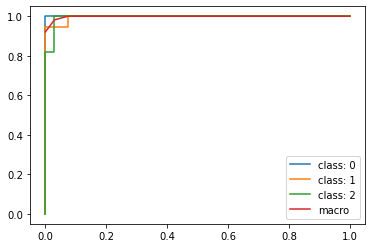

In [130]:
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f"class: {i}")
plt.plot(fpr["macro"], tpr["macro"], label="macro")
plt.legend()


### micro平均

In [137]:
y_test_one_hot.ravel()


array([0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0])

In [135]:
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_one_hot.ravel(), y_pred_proba.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])


#### それぞれのクラスとmacro平均とmicro平均のROCを描画

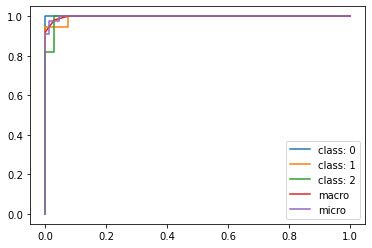

In [141]:
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f"class: {i}")
plt.plot(fpr["macro"], tpr["macro"], label="macro")
plt.plot(fpr["micro"], tpr["micro"], label="micro")
plt.legend()
